In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV , cross_val_score
from collections import OrderedDict
from operator import itemgetter
from sklearn.metrics import recall_score
from sklearn.ensemble import AdaBoostClassifier


In [164]:
import warnings
warnings.filterwarnings( 'ignore' )

In [3]:
df = pd.read_csv('/Users/irenebernardi/Desktop/ML /Glioma-Grading-Classification/TCGA_GBM_LGG_Mutations_all.csv')
df


,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,TCGA-GBM,TCGA-19-5959,Female,77 years 325 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,GBM,TCGA-GBM,TCGA-16-0846,Male,85 years 65 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,GBM,TCGA-GBM,TCGA-28-1746,Female,77 years 178 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,GBM,TCGA-GBM,TCGA-32-2491,Male,63 years 121 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


## Data preprocessing

In [4]:
for i in df.columns:
    print(df[i].unique())

['LGG' 'GBM']
['TCGA-LGG' 'TCGA-GBM']
['TCGA-DU-8164' 'TCGA-QH-A6CY' 'TCGA-HW-A5KM' 'TCGA-E1-A7YE'
 'TCGA-S9-A6WG' 'TCGA-DB-A4X9' 'TCGA-P5-A5F4' 'TCGA-FG-A4MY'
 'TCGA-HT-A5R5' 'TCGA-DU-A76K' 'TCGA-QH-A6CV' 'TCGA-FG-5962'
 'TCGA-DU-6402' 'TCGA-DB-A75M' 'TCGA-DB-A4XG' 'TCGA-DU-5851'
 'TCGA-DB-A4XH' 'TCGA-HT-7874' 'TCGA-DH-A66D' 'TCGA-DU-5871'
 'TCGA-FG-A60J' 'TCGA-E1-A7Z3' 'TCGA-DU-7011' 'TCGA-VW-A8FI'
 'TCGA-DU-A7TB' 'TCGA-HT-7856' 'TCGA-TQ-A7RU' 'TCGA-HW-7486'
 'TCGA-DU-6399' 'TCGA-DU-A7TA' 'TCGA-HT-A5RA' 'TCGA-DB-5280'
 'TCGA-DU-6405' 'TCGA-S9-A7J1' 'TCGA-S9-A7J2' 'TCGA-HW-7495'
 'TCGA-FG-A710' 'TCGA-P5-A5ET' 'TCGA-DU-7300' 'TCGA-DU-A5TY'
 'TCGA-VM-A8CH' 'TCGA-R8-A6YH' 'TCGA-S9-A6WE' 'TCGA-HT-7681'
 'TCGA-KT-A7W1' 'TCGA-FG-5964' 'TCGA-S9-A6TX' 'TCGA-P5-A5F2'
 'TCGA-DU-5874' 'TCGA-DU-A5TT' 'TCGA-CS-5396' 'TCGA-DU-7302'
 'TCGA-S9-A6TW' 'TCGA-RY-A845' 'TCGA-HT-A61A' 'TCGA-DU-7018'
 'TCGA-HW-7489' 'TCGA-R8-A6ML' 'TCGA-DH-5144' 'TCGA-DU-7013'
 'TCGA-CS-4941' 'TCGA-WY-A85E' 'TCGA-DH-A7UR' '

In [5]:
# Replacing categorical variables with binary
df.replace({'MUTATED': 1, 'NOT_MUTATED': 0, 'Female': 1, 'Male': 0, 'LGG': 0, 'GBM': 1}, inplace=True)

In [6]:
# Removing rows with not identified variables
df = df[ (df['Gender'] != '--') & (df['Race'] != 'not reported')]

In [7]:
# Dropping unnessecary columns
df.drop(columns=(['Case_ID', 'Project', 'Primary_Diagnosis']), inplace=True)

/var/folders/8h/5vn4hvg944bdrjx5nw7kvn740000gn/T/ipykernel_23491/4293169099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=(['Case_ID', 'Project', 'Primary_Diagnosis']), inplace=True)


In [8]:
# One hot encoding for race column
df = pd.concat([df, pd.get_dummies(df['Race'], prefix='Race')], axis=1)
df.drop(columns=['Race'], inplace=True)
df


,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
0,0,0,51 years 108 days,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,38 years 261 days,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,35 years 62 days,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,32 years 283 days,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,31 years 187 days,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,77 years 325 days,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
858,1,0,85 years 65 days,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
859,1,1,77 years 178 days,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,1,0,63 years 121 days,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# Converting column 'Age_at_diagnosis' to numerical data
data = []
years = pd.DataFrame(data)

In [10]:
# Creating new dataframe where Age column is split by ' ', unnecessary columns are deleted, years and days are added together
years = df['Age_at_diagnosis'].str.split(' ', expand=True)
years.drop(columns=[1, 3], inplace=True)
years[2] = pd.to_numeric(years[2], errors='coerce')
years[0] = pd.to_numeric(years[0], errors='coerce')
years[2] = round(years[2] / 365, 2)
years[0] = years[0] + years[2]
# Old column is replaced with a new one
df['Age_at_diagnosis'] = years[0]
df

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
0,0,0,51.30,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,38.72,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,35.17,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,32.78,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,31.51,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,77.89,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
858,1,0,85.18,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
859,1,1,77.49,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,1,0,63.33,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# Imputing missing age values w mean and not median bc boxplot shows no outliers
df.rename(columns={'Age_at_diagnosis': 'Age'}, inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.describe()

,Grade,Age,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,...,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,0.419048,50.873130,0.482143,0.414286,0.258333,0.167857,0.133333,0.132143,0.116667,0.086905,...,0.032143,0.032143,0.032143,0.027381,0.027381,0.026190,0.001190,0.016667,0.070238,0.911905
std,0.493697,15.633549,0.499979,0.492892,0.437979,0.373962,0.340137,0.338848,0.321214,0.281863,...,0.176484,0.176484,0.176484,0.163288,0.163288,0.159797,0.034503,0.128095,0.255700,0.283602
min,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,51.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,62.617500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,89.290000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#normalizing age
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df

,Grade,Gender,Age,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
0,0,0,0.027305,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-0.777375,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.004451,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,-1.157327,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,-1.238563,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,1.728134,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
858,1,0,2.194439,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
859,1,1,1.702548,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,1,0,0.796804,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# Descriptive statistics
df.describe()

,Grade,Age,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
count,840.000000,8.400000e+02,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,...,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,0.419048,4.372693e-15,0.482143,0.414286,0.258333,0.167857,0.133333,0.132143,0.116667,0.086905,...,0.032143,0.032143,0.032143,0.027381,0.027381,0.026190,0.001190,0.016667,0.070238,0.911905
std,0.493697,1.000000e+00,0.499979,0.492892,0.437979,0.373962,0.340137,0.338848,0.321214,0.281863,...,0.176484,0.176484,0.176484,0.163288,0.163288,0.159797,0.034503,0.128095,0.255700,0.283602
min,0.000000,-2.331725e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.194320e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.306158e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,7.512286e-01,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,2.457335e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Age'>

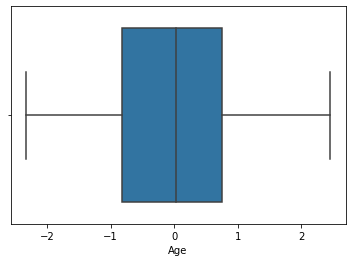

In [14]:
sns.boxplot(data=df, x='Age')

#TODO maybe plot age before normalization

## Data visualization 

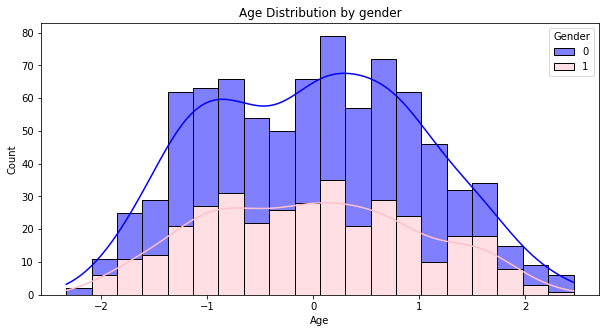

In [15]:
# Checking age distribution by gender
plt.figure(figsize=(10, 5))
sns.histplot(x='Age', data=df, hue='Gender', palette={0: 'blue', 1: 'pink'}, multiple='stack', bins=20, kde=True)
plt.title('Age Distribution by gender')
plt.show()

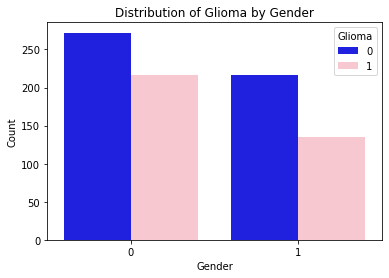

In [16]:
# Checking distribution of glioma by gender

sns.countplot(data=df, x='Gender', hue='Grade', palette={0: 'blue', 1: 'pink'})

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Glioma by Gender')
plt.legend(title='Glioma')

plt.show()

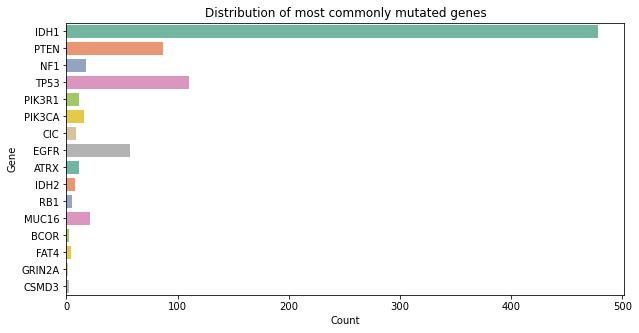

In [17]:
# distribution of most commonly mutated genes
#find most commonly mutated genes 
df['Most_commonly_mutated_gene'] = df.iloc[:, 3:-5].idxmax(axis=1)
plt.figure(figsize=(10, 5))

sns.countplot(data=df, y='Most_commonly_mutated_gene', palette='Set2')
plt.xlabel('Count')
plt.ylabel('Gene')
plt.title('Distribution of most commonly mutated genes')
plt.show()

#TODO: COMMENT IN FINAL REPORT ABOUT HOW IDH1 IS MOST RELEVANT GENE

comment: Results: We identified mutations that affected amino acid 132 of IDH1 in more than 70% of WHO grade II and III astrocytomas and oligodendrogliomas and in glioblastomas that developed from these lower-grade lesions. Tumors without mutations in IDH1 often had mutations affecting the analogous amino acid (R172) of the IDH2 gene. Tumors with IDH1 or IDH2 mutations had distinctive genetic and clinical characteristics, and patients with such tumors had a better outcome than those with wild-type IDH genes. Each of four tested IDH1 and IDH2 mutations reduced the enzymatic activity of the encoded protein.

In [18]:
fig = make_subplots(rows=5, cols=4)

# Loop through columns 3 to 22 (indexing from 0 to 19)
column_names = []  # List to store column names for legend

for i, column in enumerate(df.iloc[:, 3:23].columns, start=1):
    row_num = (i - 1) // 4 + 1  # Calculate row number
    col_num = (i - 1) % 4 + 1   # Calculate column number

    value_counts = df[column].value_counts()

    fig.add_trace(
        go.Bar(x=value_counts.index, y=value_counts.values),
        row=row_num, col=col_num
    )
    
    column_names.append(f'Column {column}')  # Store column names for legend

    fig.update_xaxes(title_text=f'{column}', row=row_num, col=col_num)  # X-axis title

# Update layout for all subplots
fig.update_layout(title='Value Counts for Columns 3 to 22', width = 1000, height = 1200)
fig.for_each_trace(lambda trace: trace.update(name=column_names.pop(0)))  # Update trace names using stored column names
fig.show()

Explains why IDH1 mutations so prevalent (boxplot balanced). Also expect that correlation matrix will show inv corrs between idh1 and idh2

Other mutations imbalanced bc not all gliomas have all mutated genes

<AxesSubplot:>

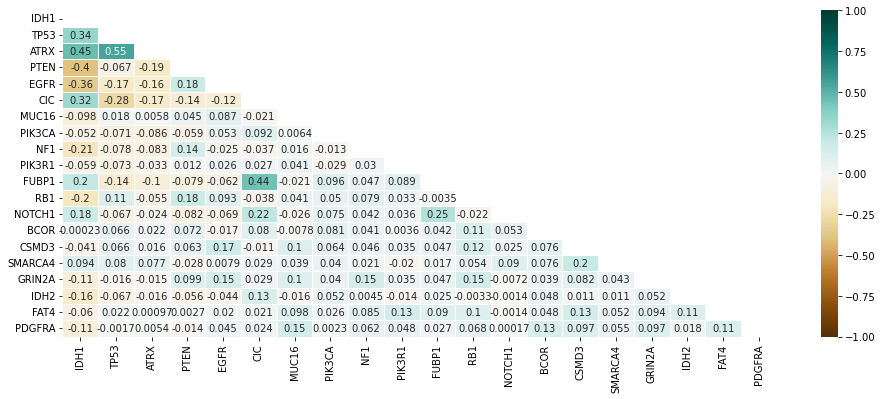

In [19]:
# Visualization of correlation between variables
plt.figure(figsize=(16, 6))
corr = df.iloc[:, 3 : 23].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, linewidths=.5, cmap='BrBG')

In [21]:
##########ATTEMPT AT MCA##########

'''class MCA(CA):

    """
    Args:
        dataframe (pandas.DataFrame): A dataframe where each column is a variable.
        use_benzecri_rates (bool): Whether to use Benzecri rates to inflate the eigenvalues.
        plotter (str): The plotting backend used to build the charts. Can be any of: 'mpl'.
    """
 def __init__(self, dataframe, use_benzecri_rates=False, plotter='mpl'):'''
import prince
from prince import mca 
####TRYING JUST ON CORRELATED VALUES
'''correlated_genes = ['ATRX', 'IDH1', 'TP53', 'CIC', 'FUBP1']
df_correlated_genes = pd.DataFrame(correlated_genes)'''
mca_ = prince.MCA( n_components=2) #, use_benzecri_rates=False, plotter='mpl')
mca_.fit(correlatedgenes)
'''correlated_genes = ['ATRX', 'IDH1', 'TP53', 'CIC', 'FUBP1']
#not sure how many components to pick?
mca = prince.MCA(correlated_genes, n_components=2)# use_benzecri_rates=False, plotter='mpl' )'''




ValueError: The X argument must be a pandas DataFrame, but got tuple

In [70]:
correlatedgenes = df['ATRX'],df['IDH1'] , df['TP53'], df['CIC'], df['FUBP1']#, 'IDH1', 'TP53', 'CIC', 'FUBP1']

correlatedgenes

(0      0
 1      0
 2      1
 3      1
 4      1
       ..
 857    0
 858    0
 859    0
 860    0
 861    0
 Name: ATRX, Length: 840, dtype: int64,
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 857    0
 858    0
 859    0
 860    0
 861    0
 Name: IDH1, Length: 840, dtype: int64,
 0      0
 1      0
 2      1
 3      1
 4      1
       ..
 857    0
 858    1
 859    1
 860    1
 861    0
 Name: TP53, Length: 840, dtype: int64,
 0      0
 1      1
 2      0
 3      0
 4      0
       ..
 857    0
 858    0
 859    0
 860    0
 861    0
 Name: CIC, Length: 840, dtype: int64,
 0      1
 1      0
 2      0
 3      0
 4      0
       ..
 857    0
 858    0
 859    0
 860    0
 861    0
 Name: FUBP1, Length: 840, dtype: int64)

In [71]:
correlatedgenes = pd.DataFrame(correlatedgenes)
correlatedgenes

,0,1,2,3,4,5,6,7,8,9,...,852,853,854,855,856,857,858,859,860,861
ATRX,0,0,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
IDH1,1,1,1,1,1,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
TP53,0,0,1,1,1,0,1,1,1,0,...,0,0,1,0,0,0,1,1,1,0
CIC,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FUBP1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
#reverse 
'''correlatedgenes = correlatedgenes.T()
'''
correlatedgenes = correlatedgenes.transpose()
correlatedgenes


,ATRX,IDH1,TP53,CIC,FUBP1
0,0,1,0,0,1
1,0,1,0,1,0
2,1,1,1,0,0
3,1,1,1,0,0
4,1,1,1,0,0
...,...,...,...,...,...
857,0,0,0,0,0
858,0,0,1,0,0
859,0,0,1,0,0
860,0,0,1,0,0


In [73]:

'''mca_ = prince.MCA( n_components=2) #, use_benzecri_rates=False, plotter='mpl')
mc = mca_.fit(correlatedgenes)
mca1 = mca_.transform(correlatedgenes)
mc.plot_coordinates(X=correlatedgenes, ax=None)'''

mc = prince.MCA(one_hot=False)
mc = prince.MCA(n_components=2).fit(correlatedgenes)
'''mc.plot(X=correlatedgenes, )'''
mc.plot(correlatedgenes) # ax=ax)#(df[cols_list])



alt.LayerChart(...)

In [74]:
# Eigenvalues
print("Eigenvalues:", mc.eigenvalues_)



# Row coordinates
print("Row coordinates:")
print(mc.row_coordinates(correlatedgenes))


# Column coordinates
print("Column coordinates:")
print(mc.column_coordinates(correlatedgenes))

Eigenvalues: [0.38639976 0.33162974]
Row coordinates:
            0         1
0    0.517580  1.185199
1    0.473459  0.878014
2   -1.035375  0.144865
3   -1.035375  0.144865
4   -1.035375  0.144865
..        ...       ...
857  0.497406 -0.418075
858 -0.053484 -0.435737
859 -0.053484 -0.435737
860 -0.053484 -0.435737
861  0.497406 -0.418075

[840 rows x 2 columns]
Column coordinates:
                0         1
ATRX_0   0.505077 -0.075633
ATRX_1  -1.450060  0.217140
IDH1_0   0.528733 -0.664871
IDH1_1  -0.567898  0.714121
TP53_0   0.709337  0.021068
TP53_1  -1.002856 -0.029786
CIC_0   -0.135077 -0.310922
CIC_1    0.887128  2.042001
FUBP1_0 -0.062107 -0.173433
FUBP1_1  1.097228  3.063986


In [82]:
mc.column_contributions_.style.format('{:.0%}')

#TODO add to presentation

,0,1
ATRX_0,10%,0%
ATRX_1,28%,1%
IDH1_0,7%,14%
IDH1_1,8%,15%
TP53_0,15%,0%
TP53_1,22%,0%
CIC_0,1%,5%
CIC_1,5%,33%
FUBP1_0,0%,2%
FUBP1_1,3%,30%


In [76]:
mc.column_cosine_similarities(correlatedgenes).head()
#say this is a sanity check and that thigns were not very accurately projected on dimensions except for one 

,0,1
ATRX_0,0.732392,0.016423
ATRX_1,0.732392,0.016423
IDH1_0,0.300267,0.474798
IDH1_1,0.300267,0.474798
TP53_0,0.711364,0.000628


In [83]:
allgenes=df. iloc [ :,3:-5 ]

In [78]:
#new mca 
mc2 = prince.MCA(one_hot=False)
mc2 = prince.MCA(n_components=2).fit(allgenes)
mc2.plot(allgenes) # ax=ax)#(df[cols_list])



alt.LayerChart(...)

In [79]:
# Eigenvalues
print("Eigenvalues:", mc2.eigenvalues_)

# Row coordinates
print("Row coordinates:")
print(mc2.row_coordinates(allgenes))


# Column coordinates
print("Column coordinates:")
print(mc2.column_coordinates(allgenes))

Eigenvalues: [0.12035598 0.10021959]
Row coordinates:
            0         1
0   -0.163432  0.662531
1   -0.205769  0.394452
2   -0.463021 -0.291714
3   -0.178595 -0.119705
4   -0.463021 -0.291714
..        ...       ...
857  0.330845 -0.091747
858  0.191994 -0.263656
859  0.191994 -0.263656
860  0.324551 -0.135070
861  0.120239 -0.014920

[840 rows x 2 columns]
Column coordinates:
                  0         1
IDH1_0     0.826101 -0.143038
IDH1_1    -0.887294  0.153633
TP53_0     0.399129  0.450927
TP53_1    -0.564285 -0.637518
ATRX_0     0.353949  0.248192
ATRX_1    -1.016177 -0.712553
PTEN_0    -0.245287  0.081650
PTEN_1     1.215997 -0.404777
EGFR_0    -0.207904  0.034310
EGFR_1     1.351374 -0.223012
CIC_0      0.072494 -0.303303
CIC_1     -0.476110  1.991965
MUC16_0   -0.066850  0.020476
MUC16_1    0.506149 -0.155030
PIK3CA_0  -0.027247 -0.080198
PIK3CA_1   0.286275  0.842631
NF1_0     -0.089782 -0.019489
NF1_1      1.035839  0.224856
PIK3R1_0  -0.031738 -0.037769
PIK3R1_1   0.4

In [81]:
mc2.column_contributions_.style.format('{:.0%}')

,0,1
IDH1_0,15%,1%
IDH1_1,16%,1%
TP53_0,4%,6%
TP53_1,5%,8%
ATRX_0,4%,2%
ATRX_1,11%,7%
PTEN_0,2%,0%
PTEN_1,10%,1%
EGFR_0,2%,0%
EGFR_1,10%,0%


We will explain that we had initially hypothesized to use PCA because of the high dimensionality of the dataset. 
However, upon inspecting feature correlations (which we DID NOT DO WELL) and determining that we cannot establish a complete lack of linear correlation (bc of MENTION CORRELATIONS AND PAPER BACKED UP EVIDENCE) between features, we decided not to perform feature scaling. 

Yes, PCA can be applied even if there are many binary columns in your dataset. PCA operates on the correlation structure of the data, and it can be applied regardless of the type of data (binary, categorical, numerical, etc.). However, whether it's effective or advisable to use PCA with binary data depends on the specific characteristics of your dataset and your objectives.

When applying PCA to binary data, it's essential to consider a few points:

### Sparsity and Interpretation:
- **Sparsity:** Binary data often leads to sparse matrices, which might affect the effectiveness of PCA.
- **Interpretation:** Interpretability might be reduced as the principal components become linear combinations of binary variables.

### Variance Explained:
- **Explained Variance:** With binary data, the variance might not be well captured by principal components compared to continuous variables.

### Dimensionality Reduction:
- **Reducing Dimensionality:** Despite the above challenges, PCA might still help in reducing dimensionality and might be beneficial if the binary variables are highly correlated.

### Alternative Methods:
- **Alternative Techniques:** For binary data, alternative dimensionality reduction techniques like factor analysis or non-linear methods might be more suitable.

### Sparse PCA:
- **Sparse PCA:** There's also Sparse PCA, which is designed to handle sparse data more effectively by encouraging sparsity in the loadings.

Before applying PCA to binary data, consider the trade-offs and whether it aligns with your objectives, especially in terms of interpretability, explained variance, and the underlying structure of your data. Additionally, try different techniques and assess their effectiveness based on your specific use case and dataset characteristics.

## Model Selection

In [213]:
#dremove most commonly mutated gene from dataframe before fitting model, otherwise string error
df = df.iloc[:, :-16]

In [214]:
# Define label and features
X = df.drop(columns=['Grade'])
y = df['Grade']
y.value_counts()

#lgg 57%

0    488
1    352
Name: Grade, dtype: int64

In [215]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [243]:
# Creating a list of potential models: 
models = []
model1 = LogisticRegression()
models.append(model1)
model2 = svm.SVC()
models.append(model2)
model3 = tree.DecisionTreeClassifier()
models.append(model3)
model4 = RandomForestClassifier()
models.append(model4)
model5 = AdaBoostClassifier()
models.append(model5)


#QUESTION: Why are we not setting hyperparameters here? like number of estimators for random forest, adaboost, learning rate, regularization strength for SVM and LR? 
#TODO: explain in report, we first trained several models andbased on the best ones we investigated which best params 

In [245]:
for column in X_train.columns:
    print(f"{column}: {X_train[column].unique()}")

Gender: [1 0]
Age: [33.96       41.86       53.4        62.61       60.21       78.02
 42.01       63.15       46.91       25.64       57.08       34.07
 65.11       31.51       17.74       20.32       79.34       43.61
 49.51       85.61       34.38       60.72       60.13       37.65
 48.58       30.44       55.13       33.02       42.09       65.86
 33.21       76.16       24.76       38.07       40.53       55.42
 68.92       35.17       35.12       59.03       62.6        29.13
 82.04       40.82       57.3        64.29       65.1        78.72
 38.22       40.88       51.09       32.43       48.91       55.73
 26.32       58.15       55.11       70.16       31.56       47.73
 58.4        31.99       21.79       75.35       62.55       27.16
 69.58       51.63       72.46       54.87       61.13       54.59
 41.32       35.25       65.08       20.76       44.25       64.39
 39.8        81.87       72.53       25.11       34.52       69.7
 61.06       48.36       37.78       43.86  

LogisticRegression()
Accuracy of LogisticRegression() is 0.8611111111111112
Recall (sensitivity) of LogisticRegression() is 0.912621359223301


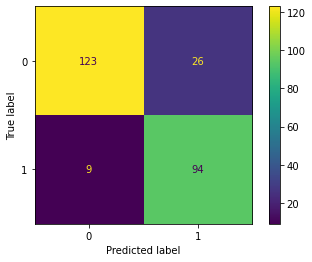

ROC AUC score of LogisticRegression() is 0.8690623574639995


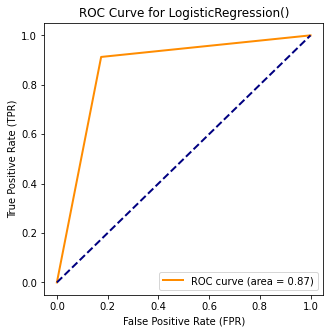

-------------------------------------------------------
SVC()
Accuracy of SVC() is 0.7658730158730159
Recall (sensitivity) of SVC() is 0.6699029126213593


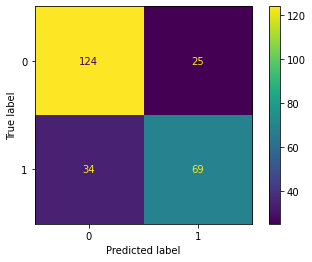

ROC AUC score of SVC() is 0.7510588388610153


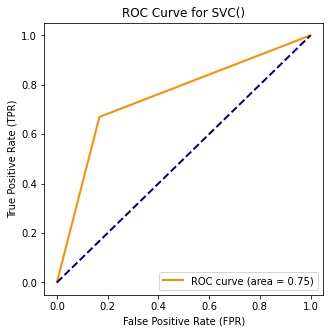

-------------------------------------------------------
DecisionTreeClassifier()
Accuracy of DecisionTreeClassifier() is 0.7738095238095238
Recall (sensitivity) of DecisionTreeClassifier() is 0.7475728155339806


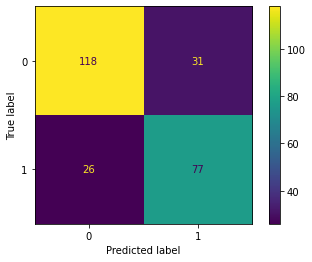

ROC AUC score of DecisionTreeClassifier() is 0.7697595621294064


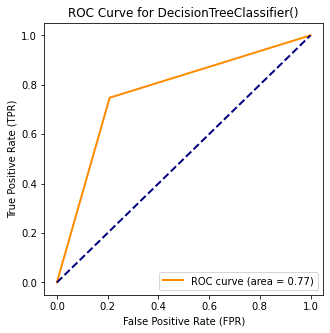

-------------------------------------------------------
RandomForestClassifier()
Accuracy of RandomForestClassifier() is 0.8253968253968254
Recall (sensitivity) of RandomForestClassifier() is 0.8155339805825242


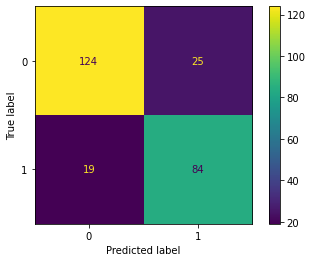

ROC AUC score of RandomForestClassifier() is 0.8238743728415977


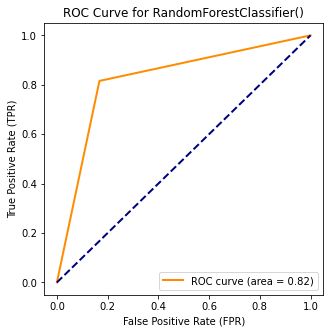

-------------------------------------------------------
AdaBoostClassifier()
Accuracy of AdaBoostClassifier() is 0.8571428571428571
Recall (sensitivity) of AdaBoostClassifier() is 0.9223300970873787


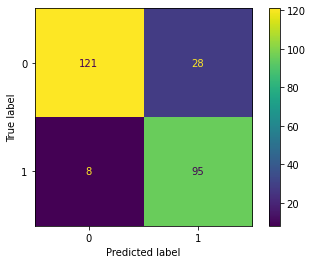

ROC AUC score of AdaBoostClassifier() is 0.8672053170000652


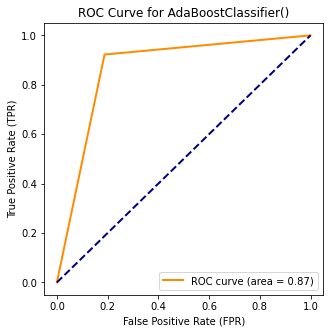

-------------------------------------------------------


In [250]:
# Creating dict for storing model's accuracy 
dict = {}
# Model evaluation with accuracy, cm, f1, roc scores
for model in models:
    print(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    # Add key-value pair to the dictionary
    dict[model] = round(recall, 2)
    print(f"Accuracy of {model} is {accuracy}")
    print(f'Recall (sensitivity) of {model} is {recall}')

    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot()
    plt.show()

    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC AUC score of {model} is {roc_auc}")

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {model}')
    plt.legend(loc='lower right')
    plt.show()
    print("-------------------------------------------------------")


   #TODO: possibly compute f1 score and compare with paper to show we did better

In [255]:
# Getting first two models with the best accuracy
sorted_dict = OrderedDict(sorted(dict.items(), key = itemgetter(1), reverse = True))
first2pairs = {k: sorted_dict[k] for k in list(sorted_dict)[:2]}
print(f'the two models with best recall are {first2pairs}')

#first two models with best recall 
sorted_dict_recall =OrderedDict(sorted(dict.items(), key = itemgetter(1), reverse = True))

the two models with best recall are {AdaBoostClassifier(): 0.92, LogisticRegression(): 0.91}


In [251]:
#TODO: in report, mention that we picked recall because imbalanced y. However, we also used accuracy (cell above) as a metrics because we wanted to compare with paper, and show we have better accuracy. 



In [256]:
# Removing models from models list that didnt performe well
keys = first2pairs.keys()
models = [model for model in models if model in keys]
models

[LogisticRegression(), AdaBoostClassifier()]

In [221]:
#cross validation (ACCURACY, keeping for paper comparison)
splits = [5, 10] #trying 5 and 10 folds
for i in splits:
    kf = KFold(n_splits = i, shuffle = True, random_state = 42)
    for model in models:
        accuracy = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        # f1 = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
        # roc_auc = cross_val_score(model, X_train, y_train,cv=kf, scoring='roc_auc')
        # recall = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'recall')
        print(f'''
                Accuracy of {model} for {i} splits is {round(accuracy.mean(), 5)} 
            ''')
    print("                ---------------------------------------------------------------")


#dict: model + splits: accuracy for EVERY model OR everything in one dictionary


                Accuracy of LogisticRegression() for 5 splits is 0.84528 
            

                Accuracy of RandomForestClassifier() for 5 splits is 0.82141 
            
                ---------------------------------------------------------------

                Accuracy of LogisticRegression() for 10 splits is 0.84687 
            

                Accuracy of RandomForestClassifier() for 10 splits is 0.81292 
            
                ---------------------------------------------------------------


In [ ]:
#5 folds is best , TODO: decide if AUC-ROC/ recall/ accuracy /f1 scores based on our dataset


# USE DATA FROM DICT BELOW TO DEFINE K_SPLITS

In [222]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [223]:
# GridSearchCV for logistic regression

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    #'C' : [0.001,0.01,0.1,1,10,100,1000], #this is not granular enough TODO: MENTION IN REPORT 
    'C': np.logspace(-4, 4, 20), #more granular params bc evenly dsitributed in logspace
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
    }
]

grid_search = GridSearchCV(estimator = models[0],
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = kf).fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'C': 0.0001, 'penalty': 'none', 'solver': 'saga'}
Best cross-validation score: 0.8571780385339707


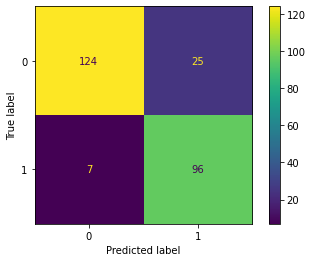

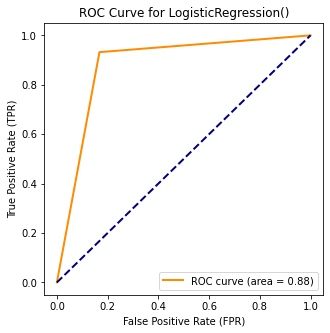

Accuracy of new LogisticRegression is 0.873015873015873


In [224]:
# y_pred with the best parameters from GridSearchCV
y_pred_g = best_model.predict(X_test)


accuracy_g = accuracy_score(y_test, y_pred_g)
cm = confusion_matrix(y_test, y_pred_g, labels = models[0].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = models[0].classes_)
disp.plot()
plt.show()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_g)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve for {models[0]}')
plt.legend(loc='lower right')
plt.show()
print(f"Accuracy of new LogisticRegression is {accuracy_g}")

In [229]:
y_pred = models[0].predict(X_test)
prev_accuracy = accuracy_score(y_test, y_pred)
print(f"Previous accuracy of LogisticRegression is {prev_accuracy}")

if accuracy_g > prev_accuracy:
    print("Accuracy improved after gridsearch")
    print(f'GridSearch accuracy is {accuracy_g}')
else: 
    print("Accuracy did not improve after gridsearch")

Previous accuracy of LogisticRegression is 0.8611111111111112
Accuracy improved after gridsearch
GridSearch accuracy is 0.873015873015873


In [230]:
#Randomsearch for logistic regression, TODO: write in report why we think we should do both types of searches 

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    #'C' : [0.001,0.01,0.1,1,10,100,1000], #this is not granular enough TODO: MENTION IN REPORT 
    'C': np.logspace(-4, 4, 20), #more granular params bc evenly dsitributed in logspace
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
    }
]

randomized_search = RandomizedSearchCV(estimator = models[0],
                           param_distributions = param_grid,
                           scoring = 'accuracy',
                           cv = kf).fit(X_train, y_train)

# Get the best estimator
best_model_rs = randomized_search.best_estimator_

print(f"Best parameters: {randomized_search.best_params_}")
print(f"Best cross-validation score: {randomized_search.best_score_}")

Best parameters: {'solver': 'saga', 'penalty': 'none', 'C': 29.763514416313132}
Best cross-validation score: 0.8571780385339707


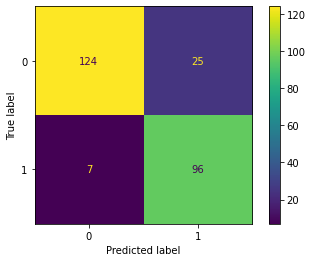

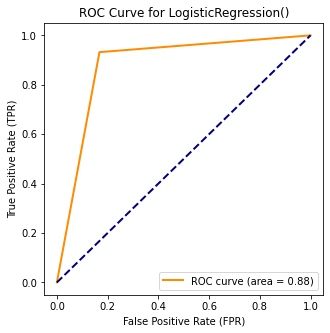

Accuracy of new LogisticRegression is 0.873015873015873


In [231]:
#now use best parameters from random search to predict y_pred

y_pred_rs = best_model_rs.predict(X_test)


accuracy_rs = accuracy_score(y_test, y_pred_rs)
cm_rs = confusion_matrix(y_test, y_pred_rs, labels = models[0].classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rs, display_labels = models[0].classes_)
disp.plot()
plt.show()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve for {models[0]}')
plt.legend(loc='lower right')
plt.show()
print(f"Accuracy of new LogisticRegression is {accuracy_rs}")

In [232]:
y_pred = models[0].predict(X_test)
prev_accuracy = accuracy_score(y_test, y_pred)
print(f"Previous accuracy of LogisticRegression is {prev_accuracy}")

if accuracy_rs > prev_accuracy:
    print("Accuracy improved after Random Search")
    print(f'Grid Search accuracy is {accuracy_g}')
    print(f'Random Search accuracy is {accuracy_rs}')
else: 
    print("Accuracy did not improve after Random Search")

Previous accuracy of LogisticRegression is 0.8611111111111112
Accuracy improved after Random Search
Grid Search accuracy is 0.873015873015873
Random Search accuracy is 0.873015873015873


In [257]:
#random search and gridsearch find the same accuracy for logistic regression, in both cases its better than paper. 


In [259]:
#using recall for gridsearch and randomsearch for logistic regression. we used accuracy above for paper comparison, but we think best metrics is still recall. 
#cross validation (ACCURACY, keeping for paper comparison)


#cross validation, recall 
splits = [5, 10] #trying 5 and 10 folds
for i in splits:
    kf = KFold(n_splits = i, shuffle = True, random_state = 42)
    for model in models:
        recall = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall')
        # f1 = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
        # roc_auc = cross_val_score(model, X_train, y_train,cv=kf, scoring='roc_auc')
        # recall = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'recall')
        print(f'''
                recall of {model} for {i} splits is {round(recall.mean(), 5)} 
            ''')
    print("                ---------------------------------------------------------------")


#dict: model + splits: accuracy for EVERY model OR everything in one dictionary


                recall of LogisticRegression() for 5 splits is 0.88211 
            

                recall of AdaBoostClassifier() for 5 splits is 0.86093 
            
                ---------------------------------------------------------------

                recall of LogisticRegression() for 10 splits is 0.89002 
            

                recall of AdaBoostClassifier() for 10 splits is 0.86539 
            
                ---------------------------------------------------------------


________________________________________________________________________________________________________________________

1. kfold cross validation (5,10)


2. use diff grid search hyperparameters to determine which best between randomforestclassifier and logistic regression 

3. kfold cross validation 

In [260]:
kf = KFold(n_splits=10, shuffle=True, random_state=42) #for recall, 10 splits is better. 5 was better for accuracy
# GridSearchCV for logistic regression

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    #'C' : [0.001,0.01,0.1,1,10,100,1000], #this is not granular enough TODO: MENTION IN REPORT 
    'C': np.logspace(-4, 4, 20), #more granular params bc evenly dsitributed in logspace
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
    }
]

grid_search = GridSearchCV(estimator = models[0],
                           param_grid = param_grid,
                           scoring = 'recall',
                           cv = kf).fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'C': 0.012742749857031334, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9317301753163824


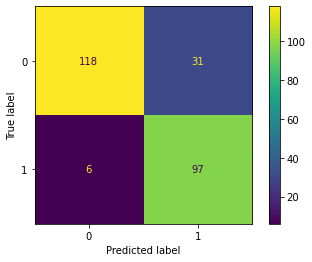

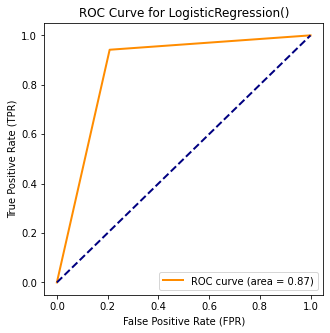

Recall of LogisticRegression after Grid Search is 0.941747572815534
Before Grid Search, LogisticRegression Recall was  0.91


In [264]:
# y_pred with the best recall parameters from GridSearchCV
y_pred_g = best_model.predict(X_test)


recall_grid = recall_score(y_test, y_pred_g)
cm = confusion_matrix(y_test, y_pred_g, labels = models[0].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = models[0].classes_)
disp.plot()
plt.show()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_g)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve for {models[0]}')
plt.legend(loc='lower right')
plt.show()
print(f"Recall of LogisticRegression after Grid Search is {recall_grid}")
print(f'Before Grid Search, LogisticRegression Recall was  0.91') #todo index 0.91 from dict with logregr recall value, don't write it

# TODO: 
- random search for logistic regression, recall -> see if it improves recall of 0.94 found with grid search 
- grid search and random search for adaboost: 
 1. for accuracy  (for model comparision)
 2. for recall

In [ ]:


#TODO: if adaboost stays the best after dimensionality reduction, need to change this cell to do gridsearch for adaboost, not randomforest

# FIRST recalculate crossvalidation : 1. with accuracy, 2. with recall
param_grid = [    

    }
]

grid_search = GridSearchCV(estimator=model1,#chjange model
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5).fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


SyntaxError: closing parenthesis '}' does not match opening parenthesis '[' on line 5 (3938984704.py, line 7)

In [ ]:
#randomsearch for second best model (randomforest or adaboost)

In [ ]:
#pick which best bewten rf and lr after hyperparametter turning

In [ ]:
#when found best params plt smth like this 


#Scatter plot for the actual training values
scatter = go.Scatter(x = x_train.values.flatten(), y=y_train.values.flatten(), mode='markers', name='Actual')
#line plot for the predicted training values
line = go.Scatter(x = x_train.values.flatten(), y=y_pred.values.flatten(), mode='lines', name='Predicted')
layout = go.Layout(title='Actual vs Predicted, train set', xaxis=dict(title='population'), yaxis=dict(title='profit'))
data = [scatter, line]
figtr = go.Figure(data=data, layout=layout)
figtr.show()


#predict new values based on the test set


#scatter for  y test values
scatter = go.Scatter(x = x_test.values.flatten(), y=y_test.values.flatten(), mode='markers', name='Actual')
#line for predicted y values 
line = go.Scatter(x = x_test.values.flatten(), y=new_y.values.flatten(), mode='lines', name='Predicted')
layout = go.Layout(title='Actual vs Predicted, test set', xaxis=dict(title='population'), yaxis=dict(title='profit'))
data = [scatter, line]
figte = go.Figure(data=data, layout=layout)
figte.show()


# Points to discuss

**EDA**

- check if shared things between na in age before just going w mean refill. are they actually outliers?

**Correlation matrix**

- look into who doesnt have mutations in idh1 and 2 -> is each of them related to a different glioma grade? 

- look at correlations of high values between themselves: are they more correlated to one specific form of glioma? we expect more associated with GBM based on literature 

**PCA**

- most correlated components in corr matrix are linked to GBM mostly, so can we still do PCA? can we cluster them?

**GRID SEARCH**

- random search outperforms grid search so try both. 


**Relevant notes on genes**

- p53: tumor suppressor gene, Dna damage and repair! mutations in p53 are associated with many cancers, including gliomas esp GBM

- grin2a: less involved in DNA repair, so mutation here is less bad 

- look at corrs between ATRX and p53, and are tehy linked to one specific kind of glioma more than others? 

- if highly correlated, check if they dont just exist in same place in dna

- atrx is chromosome x and p53 is chromosome 17, so they are not just in same place in dna -> can claim causation? 




<AxesSubplot:>

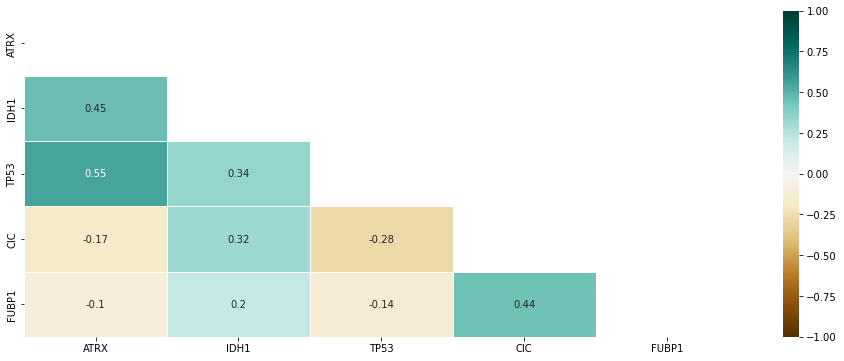

In [ ]:
# Plotting only genes that showed correlation among them, for better visualization
correlated_genes = ['ATRX', 'IDH1', 'TP53', 'CIC', 'FUBP1']
plt.figure(figsize=(16, 6))
corr2 = df[correlated_genes].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix2 = np.triu(corr2)


sns.heatmap(corr2, annot=True, mask=matrix2, vmin=-1, vmax=1, linewidths=.5, cmap='BrBG')

ATRX and IDH1 : 0.45

ATRX and TP53 : 0.55

IDH1 and TP53 : 0.34

CIC and FUBP1 : 0.44

CIC and IDH1 : 0.32 

All of these genes are fundamental in cancer development, they are involved in tasks such as cell division regulation, transcriptional repression, tumor growth interruption under unfavorable conditions (e.g. tumors), DNA structure modification. 

It is reasonable to expect that these genes would be most correlated to higher grades glioma. 
Need to determine whether this can be taken as enough evidence to "cluster" them and do PCA.


<AxesSubplot:>

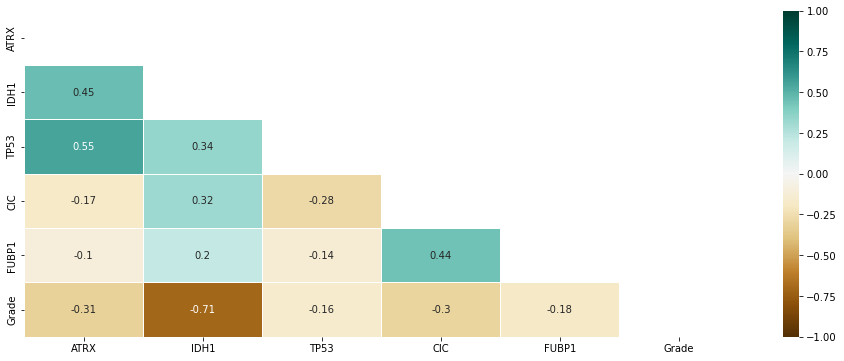

In [ ]:
# Plotting selected genes correlation with glioma grade 
plt.figure(figsize=(16, 6))
corr_genesglioma = correlated_genes = ['ATRX', 'IDH1', 'TP53', 'CIC', 'FUBP1' , 'Grade']
corr3 = df[corr_genesglioma].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix3 = np.triu(corr3)


sns.heatmap(corr3, annot=True, mask=matrix3, vmin=-1, vmax=1, linewidths=.5, cmap='BrBG')

#stronger correlation means that if the genes are mutated, the grade is more likely to be GBM. This is because we assigned 1 to mutation and 1 to GBM.

In [ ]:
#compare w open source results and see if your accuracy is better
#dont divide mutations in 0 and 1
#threshold of each gene expression

we thought accuracy wouldnt be the best metrics, so we chose recall (sensitivity): the cost of misclassifying a GBM as a "simpler" LGG is very high, we really care about false negatives. A false negative here, since GBM is 1 and LGG is 0, is a classification of LGG which in reality should have been classified as GBM. 

AUC-ROC comparing classification ability between models. 



TODO: mention why didnt pick PCA (We think every feature is important)

TODO: ASk ossnat if we should use PCA

TODO: try random search as well as grid search https://www.kdnuggets.com/2022/10/hyperparameter-tuning-grid-search-random-search-python.html